In [12]:
import matplotlib
import matplotlib.pyplot as plots
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
ages= pd.read_csv('/content/test.csv')
ages

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [ ]:
smoking_and_age = ages[['Maternal Age', 'Maternal Smoker']]
smoking_and_age

,Maternal Age,Maternal Smoker
0,27,False
1,33,False
2,28,True
3,23,True
4,25,False
...,...,...
1169,27,False
1170,24,False
1171,30,True
1172,21,False


In [ ]:
smoking_and_age['Maternal Smoker'] == True

0       False
1       False
2        True
3        True
4       False
        ...  
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal Smoker, Length: 1174, dtype: bool

In [ ]:
smoker = smoking_and_age['Maternal Age'] [smoking_and_age['Maternal Smoker'] == True]
smoker

2       28
3       23
8       30
10      32
11      23
        ..
1162    28
1163    29
1164    21
1165    30
1171    30
Name: Maternal Age, Length: 459, dtype: int64

In [ ]:
non_smoker = smoking_and_age['Maternal Age'] [smoking_and_age['Maternal Smoker'] == False]
non_smoker

0       27
1       33
4       25
5       33
6       23
        ..
1168    27
1169    27
1170    24
1172    21
1173    38
Name: Maternal Age, Length: 715, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc27da7f1c0>,
      dtype=object)

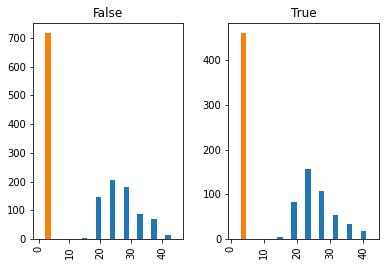

In [ ]:
#1
smoking_and_age.hist(by ='Maternal Smoker')

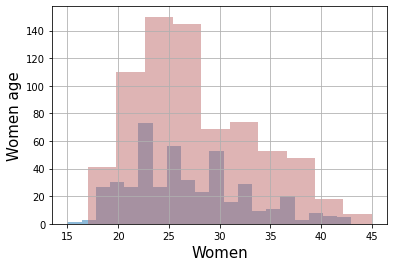

In [13]:
smoker.hist(histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Women age',fontsize=15)
plt.show()

The distribution of the Age of the babies born to mothers who smoked appears to be
shifted slightly to the left of the distribution corresponding to non-smoking mothers. The
Age of the babies of the mothers who smoked seem lower, on average than the weights
of the babies of the non-smokers. 

#2.
To determine whether there is a significant difference in the ages of the smoking and non-smoking mothers, we can use a two-sample t-test. 
This test is suitable because we are comparing the means of two independent samples and the data is not normally distributed.

#3.
Null hypothesis(H0): In the population, the distribution of Maternal Ages of babies is the same for mothers who don't smoke as for mothers who do. The difference in the sample is due to chance. Alternative hypothesis(H1): In the population, the babies of the mothers who smoke have a lower Maternal Age, on average, than the babies of the non-smokers

#4.
We will do the subtraction in the order "average weight of the smoking group - average weight of the non-smoking group". Small values (that is, large negative values) of this statistic will favor the alternative hypothesis

The observed value of the test statistic is about -0.8077 ounces. means_table = smoking_and_ages.group('Maternal Smoker',np.average)means_table

In [18]:
#4
means_table = smoking_and_age.groupby('Maternal Smoker').mean()
type(means_table)
means_table

,Birth Weight
Maternal Smoker,
False,123.085315
True,113.819172


In [15]:
#5
observed_difference = means_table['Maternal Age'][1] - means_table['Maternal Age'][0]
observed_difference

-0.8076725017901509

In [16]:
#6
smoking_and_age

,Maternal Age,Maternal Smoker
0,27,False
1,33,False
2,28,True
3,23,True
4,25,False
...,...,...
1169,27,False
1170,24,False
1171,30,True
1172,21,False


In [25]:
shuffled = smoking_and_age.sample(1174,replace = False)
shuffled

,Maternal Smoker,Birth Weight
644,True,109
782,True,109
1030,True,115
844,False,129
147,False,144
...,...,...
567,False,147
981,False,139
169,False,124
943,True,100


In [22]:
original_and_shuffled= smoking_and_age.assign(shuffled_weights=shuffled_weights.values )
original_and_shuffled

,Maternal Smoker,Birth Weight,shuffled_weights
0,False,120,132
1,False,113,108
2,True,128,137
3,True,108,131
4,False,136,136
...,...,...,...
1169,False,113,127
1170,False,128,96
1171,True,130,124
1172,False,125,98


In [27]:
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
all_group_means

,Birth Weight,shuffled_weights
Maternal Smoker,,
False,123.085315,119.258741
True,113.819172,119.779956


In [28]:
difference = all_group_means['shuffled_weights'][False]- all_group_means['shuffled_weights'][True]
difference

-0.5212151682739972

In [29]:
smoking_and_age = ages[['Maternal Smoker', 'Maternal Age']]
shuffled = smoking_and_age.sample(1174,replace = False)
shuffled_weights = shuffled['Maternal Age']
original_and_shuffled = smoking_and_age.assign(shuffled_weights=shuffled_weights.values )
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
xdifference = all_group_means['shuffled_weights'][False]- all_group_means['shuffled_weights'][True]
xdifference

0.21027164556576494

In [17]:
#7 simulating for 5000
differences = np.zeros(5000)
for i in np.arange(5000):
    smoking_and_age = ages[['Maternal Smoker', 'Birth Weight']]
    shuffled = smoking_and_age.sample(1174,replace = False)
    shuffled_weights = shuffled['Birth Weight']
    original_and_shuffled = smoking_and_age.assign(shuffled_weights=shuffled_weights.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
    differences[i] = difference
differences

array([ 0.27651172,  0.39098374,  0.1405762 , ...,  0.7343998 ,
        0.26935722, -0.52121517])

In [30]:
plt.style.use('fivethirtyeight')
differences_df = pd.DataFrame(differences)
differences_df

,0
0,0.276512
1,0.390984
2,0.140576
3,-0.027555
4,-0.353084
...,...
4995,-1.229511
4996,0.441065
4997,0.734400
4998,0.269357


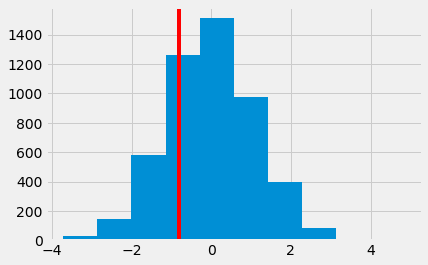

In [31]:
plt.hist(differences)
plt.axvline(x=observed_difference,c='red')

In [32]:
#8
(differences>abs(observed_difference)).mean()

0.2216

#9
The conclusion of the test is that the data support the null more than they support the alternate. The average Maternal Age of babies born to mothers who smoke is greater than or equal to the average Maternal Age of babies born to non-smokers. 